<a href="https://colab.research.google.com/github/psyifa/Analisis-Sentimen-Ulasan-Hotel/blob/main/Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# instalasi library Sastrasi untuk Stemming dalam bahasa indonesia
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


Library

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
url = "https://raw.githubusercontent.com/nakhwaazizah/Dataset/main/labeled_text.csv"

data = pd.read_csv(url)

print(data.head())

                                                text  \
0          Hotel dengan kamar yang besar dan bersih.   
1    Staff ramah, makanan enak. Lokasinya strategis.   
2  Setiap ke Bandung selalu nginep di hotel ini. ...   
3  Pelayanan ramah, lokasi strategis dekat dengan...   
4  Menginap di sini saat hotel-hotel pada full bo...   

                                          clean_text  \
0          hotel dengan kamar yang besar dan bersih.   
1    staff ramah, makanan enak. lokasinya strategis.   
2  setiap ke bandung selalu nginep di hotel ini. ...   
3  pelayanan ramah, lokasi strategis dekat dengan...   
4  menginap di sini saat hotel-hotel pada full bo...   

                                     translated_text  subjektivitas  \
0                  hotel with large and clean rooms.       0.564286   
1  friendly staff, delicious food. strategic loca...       0.750000   
2  every time i go to bandung i always stay at th...       0.800000   
3  friendly service, strategic location cl

# **Preprocessing**

In [ ]:
# menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6260 entries, 0 to 6259
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             6260 non-null   object 
 1   clean_text       6260 non-null   object 
 2   translated_text  6259 non-null   object 
 3   subjektivitas    6259 non-null   float64
 4   polaritas        6259 non-null   float64
 5   sentimen         6260 non-null   object 
dtypes: float64(2), object(4)
memory usage: 293.6+ KB


In [ ]:
data = data[['text', 'sentimen']].copy()
data.head()

,text,sentimen
0,Hotel dengan kamar yang besar dan bersih.,positif
1,"Staff ramah, makanan enak. Lokasinya strategis.",positif
2,Setiap ke Bandung selalu nginep di hotel ini. ...,positif
3,"Pelayanan ramah, lokasi strategis dekat dengan...",positif
4,Menginap di sini saat hotel-hotel pada full bo...,positif


### **2. Case Folding**

In [ ]:
# membuat fungsi untuk case folding
def casefolding(text):
  return text.lower() #mengubah kalimat menjadi huruf kecil

### 3. Cleaning

In [ ]:
#Cleaning
def cleaning(text):
  text = re.sub(r'https?://\S+|www\.\S+', '', text) #menghapus urll dari kalimat
  text = re.sub(r'[-+]?[0-9]+', '', text) #mmenghapus angka dari kalimat
  text = re.sub(r'[^\w\s]', '', text) #menghapus tanda baca dari kalimat
  text = text.strip()
  return text

### 4. Tokenisasi

In [ ]:
# Fungsi untuk tokenisasi
def tokenize(text):
    return word_tokenize(text)

### **5. Stopword**

In [ ]:
stopwords_ind = stopwords.words('indonesian')

In [ ]:
# menampilkan jumlah stopword
len(stopwords_ind)

758

In [ ]:
#melihat daftar stopwords dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
def remove_stop_words(tokens):
    filtered_tokens = [word for word in tokens if word not in stopwords_ind]
    return filtered_tokens

### 6. Stemming

In [ ]:
# Fungsi untuk stemming bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
# Contoh penggunaan
raw_sample = "Contoh teks dengan URL https://example.com dan angka 12345! btw ini adalah contoh."
case_folding = casefolding(raw_sample)
cleaned_text = cleaning(case_folding)
tokenized_text = tokenize(cleaned_text)
stopword_removal = remove_stop_words(tokenized_text)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Cleaning \t\t :', cleaned_text)
print('Tokenization \t\t :', tokenized_text)
print('Stopword Removal \t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : Contoh teks dengan URL https://example.com dan angka 12345! btw ini adalah contoh.
Case Folding 		 : contoh teks dengan url https://example.com dan angka 12345! btw ini adalah contoh.
Cleaning 		 : contoh teks dengan url  dan angka  btw ini adalah contoh
Tokenization 		 : ['contoh', 'teks', 'dengan', 'url', 'dan', 'angka', 'btw', 'ini', 'adalah', 'contoh']
Stopword Removal 	 : ['contoh', 'teks', 'url', 'angka', 'btw', 'contoh']
Stemming 		 : contoh teks url angka btw contoh


### **Penggabungan text processing**

In [ ]:
# Fungsi untuk melakukan seluruh langkah preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = cleaning(text)
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    text = stemming(tokens)
    return text


In [ ]:
%%time
data['clean_teks'] = data['text'].apply(text_preprocessing_process)

CPU times: user 13min 21s, sys: 3.1 s, total: 13min 24s
Wall time: 13min 34s


In [ ]:
#simpan data
data.to_csv('clean_data.csv')

#**Feature Engineering**

In [ ]:
data = pd.read_csv('/content/clean_data.csv')
data.head()

,Unnamed: 0,text,sentimen,clean_teks
0,0,Hotel dengan kamar yang besar dan bersih.,positif,hotel kamar bersih
1,1,"Staff ramah, makanan enak. Lokasinya strategis.",positif,staff ramah makan enak lokasi strategis
2,2,Setiap ke Bandung selalu nginep di hotel ini. ...,positif,bandung nginep hotel fasilitas nya oke banget ...
3,3,"Pelayanan ramah, lokasi strategis dekat dengan...",positif,layan ramah lokasi strategis braga mini mart j...
4,4,Menginap di sini saat hotel-hotel pada full bo...,positif,inap hotelhotel full booked event kamar luas b...


In [ ]:
# Memisahkan feature dan target
X = data['clean_teks']
y = data['sentimen']

In [ ]:
X

0                                      hotel kamar bersih
1                 staff ramah makan enak lokasi strategis
2       bandung nginep hotel fasilitas nya oke banget ...
3       layan ramah lokasi strategis braga mini mart j...
4       inap hotelhotel full booked event kamar luas b...
                              ...                        
6255    kamar pesan penuh ditawarin free upgrade kamar...
6256    kamar hadap langsung jalan raya berisik banget...
6257    mes bedroom pesan parayangan kamar tidur sesua...
6258                                                jelek
6259                        gosok gigi sedia telpon antar
Name: clean_teks, Length: 6260, dtype: object

In [ ]:
y

0       positif
1       positif
2       positif
3       positif
4       positif
         ...   
6255    positif
6256    positif
6257    negatif
6258    negatif
6259    negatif
Name: sentimen, Length: 6260, dtype: object

#**Ekstraksi Fitur (TF-IDF)**

In [ ]:
#unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tfidf = vec_TF_IDF.transform(X)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [ ]:
#menampikan  vocabulary dari hasil tf-idf
vec_TF_IDF.vocabulary_

{'hotel': 2343,
 'kamar': 2702,
 'bersih': 683,
 'staff': 5715,
 'ramah': 4808,
 'makan': 3495,
 'enak': 1738,
 'lokasi': 3394,
 'strategis': 5780,
 'bandung': 412,
 'nginep': 4062,
 'fasilitas': 1869,
 'nya': 4139,
 'oke': 4230,
 'banget': 426,
 'variasi': 6443,
 'enakenak': 1742,
 'layan': 3258,
 'braga': 861,
 'mini': 3803,
 'mart': 3610,
 'jam': 2559,
 'mudah': 3900,
 'kl': 2980,
 'butuh': 958,
 'alhamdulillah': 120,
 'best': 725,
 'view': 6465,
 'inap': 2426,
 'hotelhotel': 2347,
 'full': 1953,
 'booked': 839,
 'event': 1800,
 'luas': 3430,
 'tamu': 5926,
 'milih': 3794,
 'sesi': 5464,
 'sarap': 5217,
 'restoran': 5016,
 'lantai': 3232,
 'jumat': 2651,
 'mesjid': 3770,
 'deket': 1376,
 'pusat': 4769,
 'kuliner': 3128,
 'belanja': 592,
 'bagus': 350,
 'ruang': 5108,
 'nyaman': 4148,
 'tidur': 6144,
 'cocok': 1161,
 'keluarga': 2831,
 'anak': 175,
 'terthe': 6090,
 'kali': 2698,
 'kes': 2916,
 'kids': 2957,
 'friendly': 1942,
 'housekeeping': 2363,
 'cepat': 1043,
 'tanggap': 5937,


In [ ]:
#melihat jumlah feature
print(len(vec_TF_IDF.get_feature_names_out()))

6665


In [ ]:
#menampilkan feature apa saja yg ada di dalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aaja' 'aamiin' ... 'zone' 'zonk' 'zuhur']


# **Hasil TF-IDF**

In [ ]:
#membuat data tabular dati TF-IDF

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf = pd.DataFrame(x1, columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aaja,aamiin,abai,abang,abar,abis,abk,able,about,...,yuhu,yuk,yum,yummy,yups,zaman,zink,zone,zonk,zuhur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412701,0.0
6256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# **Feature Selection**

In [ ]:
x_train = np.array(data_tabular_tf_idf )
y_train = np.array(y)

In [ ]:
chi2_feature = SelectKBest(chi2, k=5000)
x_kbest_features = chi2_feature.fit_transform(x_train, y_train)

#untuk reduce feature
print('Original Feature Number', x_train.shape[1])
print('Reduce feature Number', x_kbest_features.shape[1])

Original Feature Number 6665
Reduce feature Number 5000


In [ ]:
Data = pd.DataFrame(chi2_feature.scores_,columns=['Nilai'])
Data

,Nilai
0,0.065105
1,0.026457
2,0.431218
3,0.058474
4,0.020327
...,...
6660,0.040172
6661,0.071654
6662,0.057326
6663,0.099884


In [ ]:
#menampilkan data feature beserta nilainya / pembobotannya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fiture'] = feature
Data

,Nilai,Fiture
0,0.065105,aa
1,0.026457,aaja
2,0.431218,aamiin
3,0.058474,abai
4,0.020327,abang
...,...,...
6660,0.040172,zaman
6661,0.071654,zink
6662,0.057326,zone
6663,0.099884,zonk


In [ ]:
#mengurutkan feature terbaik

Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fiture
3081,73.396441,kotor
945,63.680805,buruk
2602,55.089994,jelek
2791,47.502733,kecewa
529,36.423520,bau
...,...,...
1887,0.005206,female
4684,0.005206,pressed
1898,0.005206,finished
1925,0.005206,forgot


In [ ]:
mask = chi2_feature.get_support()
mask

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
#menampilkan fitur yang terpilih berdasarkan nilai mask dan chi tertinggi yang udah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f)
  selected_Feature=new_feature
selected_Feature

['aa',
 'aamiin',
 'abai',
 'abis',
 'about',
 'abu',
 'ac',
 'acara',
 'access',
 'accommodation',
 'acnya',
 'acr',
 'acung',
 'ad',
 'ada',
 'adain',
 'adan',
 'add',
 'additional',
 'ade',
 'adem',
 'adha',
 'adidas',
 'adik',
 'adu',
 'aduh',
 'adzan',
 'affordable',
 'africa',
 'afrika',
 'afrikapetugas',
 'after',
 'aga',
 'again',
 'agam',
 'agama',
 'agen',
 'agst',
 'agust',
 'ah',
 'ahad',
 'ahirnya',
 'ain',
 'air',
 'airy',
 'aj',
 'aja',
 'ajak',
 'ajakurang',
 'ajar',
 'ajib',
 'aju',
 'akad',
 'akal',
 'akhrnya',
 'akibat',
 'akomendasi',
 'akomodasi',
 'akomodatif',
 'akses',
 'aktif',
 'aktivitas',
 'ala',
 'alam',
 'alami',
 'alangkah',
 'alarm',
 'alas',
 'alat',
 'alatalatnya',
 'alau',
 'alergi',
 'alert',
 'alfa',
 'alfaexpress',
 'alfamart',
 'alhamdulilah',
 'alhamdulillaah',
 'alhamdulillah',
 'alhasil',
 'alias',
 'alih',
 'alir',
 'all',
 'allah',
 'alloh',
 'allowed',
 'almost',
 'alokasi',
 'alot',
 'alpha',
 'also',
 'alternatif',
 'although',
 'alun',
 '

In [ ]:
#membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_Feature:
    new_selected_feature[k]=v

new_selected_feature

{'hotel': 2343,
 'kamar': 2702,
 'bersih': 683,
 'staff': 5715,
 'ramah': 4808,
 'makan': 3495,
 'enak': 1738,
 'lokasi': 3394,
 'strategis': 5780,
 'bandung': 412,
 'nginep': 4062,
 'fasilitas': 1869,
 'nya': 4139,
 'oke': 4230,
 'banget': 426,
 'variasi': 6443,
 'enakenak': 1742,
 'layan': 3258,
 'braga': 861,
 'mini': 3803,
 'mart': 3610,
 'jam': 2559,
 'mudah': 3900,
 'kl': 2980,
 'butuh': 958,
 'alhamdulillah': 120,
 'best': 725,
 'view': 6465,
 'inap': 2426,
 'hotelhotel': 2347,
 'full': 1953,
 'booked': 839,
 'event': 1800,
 'luas': 3430,
 'tamu': 5926,
 'milih': 3794,
 'sesi': 5464,
 'sarap': 5217,
 'restoran': 5016,
 'lantai': 3232,
 'jumat': 2651,
 'mesjid': 3770,
 'deket': 1376,
 'pusat': 4769,
 'kuliner': 3128,
 'belanja': 592,
 'bagus': 350,
 'ruang': 5108,
 'nyaman': 4148,
 'tidur': 6144,
 'cocok': 1161,
 'keluarga': 2831,
 'anak': 175,
 'terthe': 6090,
 'kali': 2698,
 'kes': 2916,
 'kids': 2957,
 'friendly': 1942,
 'housekeeping': 2363,
 'cepat': 1043,
 'tanggap': 5937,


In [ ]:
len(new_selected_feature)

5000

In [ ]:
#menyimpan selected feature yang baru
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav","wb"))

# **Penyeimbangan Data**

In [ ]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_kbest_features, y)

In [ ]:
# Menghitung jumlah data setiap kelas sentimen setelah oversampling
sentimen_setelah_oversampling = pd.Series(y_resampled).value_counts()

# Tampilkan jumlah data setiap kelas sentimen
print("Jumlah data setelah oversampling:\n", sentimen_setelah_oversampling)


Jumlah data setelah oversampling:
 sentimen
positif    5597
negatif    5597
netral     5597
Name: count, dtype: int64


In [ ]:
# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

# **Modelling**

In [ ]:
selected_x =x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print('Banyaknya X_train :', len(x_train))
print('Banyaknya X_test :', len(x_test))
print('Banyaknya Y_train :', len(y_train))
print('Banyaknya Y_train :', len(y_train))

Banyaknya X_train : 13432
Banyaknya X_test : 3359
Banyaknya Y_train : 13432
Banyaknya Y_train : 13432


In [ ]:
text_algorithm = MultinomialNB()

In [ ]:
model = text_algorithm.fit(x_train, y_train)

In [ ]:
data_input = ("Setiap ke Bandung selalu nginep di hotel ini. Fasilitas nya oke banget. Makanannya juga bervariasi dan enak-enak semua.")
data_input = text_preprocessing_process(data_input)

tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error='replace', vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))
hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil == 'positif'):
  s = "Sentimen Positif"
elif(hasil == 'negatif'):
  s = "Sentimen Negatif"
else:
  s = "Sentimen Netral"

print ("Hasil Prediksi : \n",s)

Hasil Prediksi : 
 Sentimen Positif


# **Evaluasi Model**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predicted = model.predict(x_test)
CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

     negatif       0.89      0.92      0.91      1132
      netral       0.93      0.97      0.95      1126
     positif       0.92      0.84      0.88      1101

    accuracy                           0.91      3359
   macro avg       0.91      0.91      0.91      3359
weighted avg       0.91      0.91      0.91      3359



In [ ]:
pickle.dump(model,open("model_sentimen.sav","wb"))

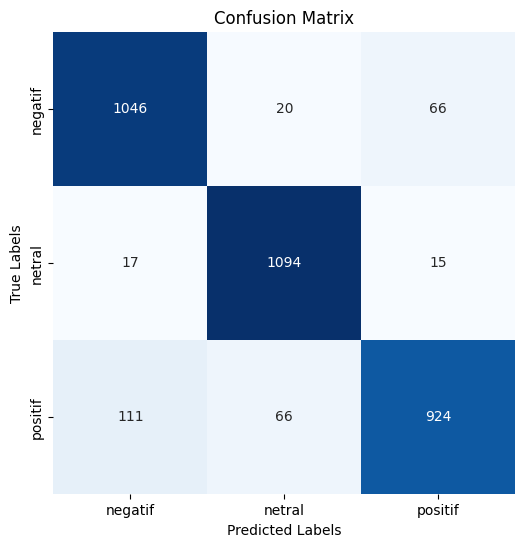

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Contoh confusion matrix yang telah dihasilkan sebelumnya
# Misalnya CM adalah confusion matrix yang sudah dihitung sebelumnya

# Labels untuk confusion matrix
labels = ['negatif', 'netral', 'positif']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install wordcloud matplotlib

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

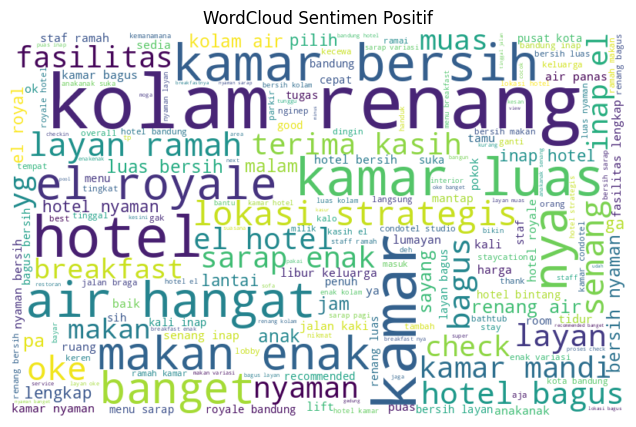

In [ ]:
# Ambil teks untuk masing-masing kategori sentimen
texts_positif = data[data['sentimen'] == 'positif']['clean_teks'].tolist()

# Fungsi untuk membuat WordCloud
def create_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat WordCloud untuk sentimen positif
create_wordcloud(texts_positif, "WordCloud Sentimen Positif")

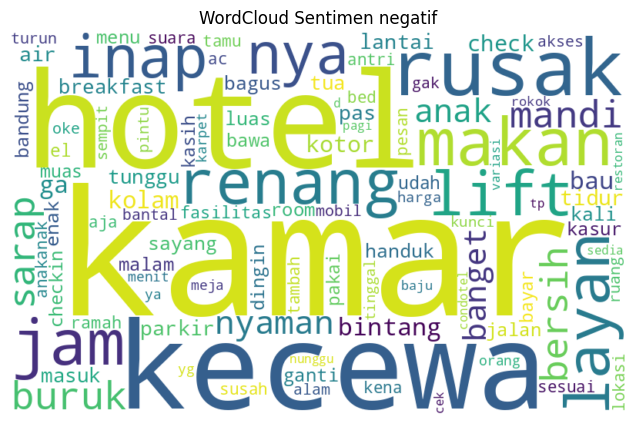

In [ ]:
# Ambil teks untuk masing-masing kategori sentimen
texts_negatif = data[data['sentimen'] == 'negatif']['clean_teks'].tolist()

# Fungsi untuk membuat WordCloud
def create_unique_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=100, collocations=False).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat WordCloud untuk sentimen negatif
create_unique_wordcloud(texts_negatif, "WordCloud Sentimen negatif")